In [67]:
fn1 = "Ayoub"
ln1 = "BENABBOU"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

print(filename)

sd-tsia204_lab2_benabbou_ayoub.ipynb


In [39]:
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import t
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

In [20]:
from sklearn.datasets import fetch_california_housing


data = fetch_california_housing()

X_tild = data.data # features

Y= data.target # target variablle

feature_names = data.feature_names  # Feature names

X_tild

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
ones = np.ones((X_tild.shape[0], 1))

X = np.hstack((ones,X_tild))
X

array([[   1.        ,    8.3252    ,   41.        , ...,    2.55555556,
          37.88      , -122.23      ],
       [   1.        ,    8.3014    ,   21.        , ...,    2.10984183,
          37.86      , -122.22      ],
       [   1.        ,    7.2574    ,   52.        , ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.        ,    1.7       ,   17.        , ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.        ,    1.8672    ,   18.        , ...,    2.12320917,
          39.43      , -121.32      ],
       [   1.        ,    2.3886    ,   16.        , ...,    2.61698113,
          39.37      , -121.24      ]])

**Question 1.a**

In [30]:
X_transpose = np.transpose(X)

result  = np.dot(X_transpose, X)

result_inv = np.linalg.inv(result)

matrix = np.dot(result_inv,X_transpose)
# Reshape Y to a column vector
Y_reshaped = Y.reshape(-1, 1)

theta_hat =np.dot(matrix , Y_reshaped)

Y_hat = np.dot(X, theta_hat)



In [7]:
len(theta_hat)

9

In [12]:
def MSE(Y, Y_hat):
  return np.mean((Y-Y_hat)**2)
MSE(Y,Y_hat)

2.1387796139751956

In [19]:
def R2(Y, Y_hat):
    y_bar = np.mean(Y)
    Y_mean = np.full((len(Y), 1), y_bar)

    RSS = np.sum((Y - Y_hat)**2)
    TSS = np.sum((Y - Y_mean)**2)

    R_squared = 1 - RSS / TSS
    return R_squared

R2(Y,Y_hat)

-0.6062326851969437

In [10]:

mse = mean_squared_error(Y, Y_hat)
mse

0.5243209861846071

In [11]:
R2 = r2_score(Y, Y_hat)
R2


0.6062326851998051

**Question 1.b** : Confidence intervals

In [14]:
alpha = 0.01
n = len(Y)
p=len(X_tild[0])
G_hat  = np.dot(X_transpose, X)/n
G_hat_inv = np.linalg.inv(G_hat)
s1_squared = G_hat_inv[1][1]
sigma_hat = np.sqrt(n*MSE(Y,Y_hat)/(n-p-1))
quantile = t.ppf(1- alpha/2, n-p-1)


In [15]:
for i in range(p+1):
  s= np.sqrt(G_hat_inv[i][i])

  upper_bound = theta_hat[i] + s*sigma_hat*quantile/np.sqrt(n)
  lower_bound = theta_hat[i] - s*sigma_hat*quantile/np.sqrt(n)

  print("for the ", i,"th varible, the lower bound is ", lower_bound," and the upper bound is ", upper_bound )

for the  0 th varible, the lower bound is  [-40.37005134]  and the upper bound is  [-33.51378907]
for the  1 th varible, the lower bound is  [0.41485794]  and the upper bound is  [0.45852865]
for the  2 th varible, the lower bound is  [0.00711385]  and the upper bound is  [0.0117577]
for the  3 th varible, the lower bound is  [-0.13794281]  and the upper bound is  [-0.07670127]
for the  4 th varible, the lower bound is  [0.49868369]  and the upper bound is  [0.7914477]
for the  5 th varible, the lower bound is  [-2.86857765e-05]  and the upper bound is  [2.07329977e-05]
for the  6 th varible, the lower bound is  [-0.00632249]  and the upper bound is  [-0.00125059]
for the  7 th varible, the lower bound is  [-0.45875862]  and the upper bound is  [-0.38387013]
for the  8 th varible, the lower bound is  [-0.47370628]  and the upper bound is  [-0.39532123]


**Question 2.a**

In [23]:
filepath = 'data.csv'
df = pd.read_csv(filepath)

In [24]:
df.head()

,-1.298173374733184726e+00,-1.622490637183908735e-01,1.223379369153350549e+00,1.355554339582927481e+00,1.080170627962381058e+00,6.349793274139390320e-01,2.987410831264468158e-01,5.482702692046558246e-01,7.317733641828934044e-01,1.018645435297013568e+00,...,5.882777992748500218e-01,2.101056224387073124e-01,1.861458271316984936e+00,-4.363994858971800839e-01,2.792989402465480553e-01,-1.416019733199122221e+00,-2.332362908037092009e+00,2.150961139501001429e-01,-6.933193671119128876e-01,1.510000000000000000e+02
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
3,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
4,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0


from matplotlib import pyplot as plt
_df_0['-1.298173374733184726e+00'].plot(kind='hist', bins=20, title='-1.298173374733184726e+00')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['-1.622490637183908735e-01'].plot(kind='hist', bins=20, title='-1.622490637183908735e-01')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['1.223379369153350549e+00'].plot(kind='hist', bins=20, title='1.223379369153350549e+00')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['1.355554339582927481e+00'].plot(kind='hist', bins=20, title='1.355554339582927481e+00')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='-1.298173374733184726e+00', y='-1.622490637183908735e-01', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='-1.622490637183908735e-01', y='1.223379369153350549e+00', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='1.223379369153350549e+00', y='1.355554339582927481e+00', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='1.355554339582927481e+00', y='1.080170627962381058e+00', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['-1.298173374733184726e+00'].plot(kind='line', figsize=(8, 4), title='-1.298173374733184726e+00')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['-1.622490637183908735e-01'].plot(kind='line', figsize=(8, 4), title='-1.622490637183908735e-01')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['1.223379369153350549e+00'].plot(kind='line', figsize=(8, 4), title='1.223379369153350549e+00')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['1.355554339582927481e+00'].plot(kind='line', figsize=(8, 4), title='1.355554339582927481e+00')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
target_column = df.columns[-1]
features = df.drop(target_column, axis=1)
target = df[target_column]

# Separating the data into train and test sets

X_train_brut, X_test_brut, Y_train_brut, Y_test_brut = train_test_split(features, target, test_size=0.25, random_state=0)

scaler = StandardScaler()

# Use only the training set to calculate the mean and variance, standarize the training set, and then at test time,
# use that same (training) mean and variance to normalize the test set
X_train = scaler.fit_transform(X_train_brut)

X_test = scaler.transform(X_test_brut)

Y_train= scaler.fit_transform(Y_train_brut.values.reshape(-1, 1))
Y_test = scaler.transform(Y_test_brut.values.reshape(-1, 1))

**Question 2.b:** OLS

In [34]:
X_train_transpose = np.transpose(X_train)

result_train  = np.dot(X_train_transpose, X_train)

result_train_inv = np.linalg.inv(result_train)

matrix_train = np.dot(result_train_inv,X_train_transpose)
# Reshape Y to a column vector
#Y_reshaped = Y.reshape(-1, 1)

theta_train_hat =np.dot(matrix_train , Y_train)

In [35]:
theta_train_hat

array([[ 4.48461286],
       [ 0.98427249],
       [ 0.1777262 ],
       [ 3.40508977],
       [-1.41056264],
       [ 0.16620871],
       [-1.98698149],
       [-0.15102368],
       [-4.9418582 ],
       [ 6.74163344],
       [ 1.22806306],
       [-1.50452496],
       [ 1.23473531],
       [-0.37046061],
       [-2.21977994],
       [-0.8836968 ],
       [-3.35412114],
       [-0.91613999],
       [-5.57736127],
       [ 1.5164118 ],
       [-6.69718991],
       [-2.97759618],
       [-3.13752509],
       [ 0.34572729],
       [ 1.64879845],
       [ 0.97694759],
       [-1.78013549],
       [-7.21553018],
       [ 2.86132782],
       [-3.68715852],
       [-2.46496755],
       [ 6.96629819],
       [-1.04688701],
       [ 3.16256813],
       [-0.03152796],
       [-2.53015489],
       [-0.2895151 ],
       [-1.86549451],
       [ 2.83674469],
       [ 1.59764492],
       [ 3.43360264],
       [ 3.30100174],
       [-0.3046424 ],
       [-0.64923016],
       [ 3.29997541],
       [ 3

**Question 3**

In [ ]:
def f_variable_selection(X, Y, p_stop=None, stop_cirterion=False):
    ''' Performs forward variable selection on the training input data X and training output data Y
        Returns :
           + S : a list containing the selected variables in order
           + p_values : their respective p-values
           + S_stop : a list containing the selected variables, in order, based on the stop criterion
    '''

    n, p = X.shape
    S = []  # To store all the variables, in their order of 'importance'
    S_stop = []  # To store all the variables with a p-value smaller than p_stop
    p_values = []
    r = Y

    while len(S) < p:
        T = {}
        Thetas = {}
        for k in range(p):
            # Each k define a submodel --> the covariates are "competing" one against the other
            if k not in S:
                X_ = np.stack((np.ones(n), X[:, k]), axis=1)
                reg = LinearRegression(fit_intercept=True)
                reg.fit(X_, r)
                theta_hat = reg.coef_.T
                Gram_hat = X_.T @ X_ / n  # The Gram matrix
                s_hat = np.sqrt(np.linalg.inv(Gram_hat)[0][0])
                sigma_hat = np.linalg.norm(
                    r - X_ @ theta_hat)**2 / (n-2)  # The noise
                # The statistic used for the test of no-effect
                # The larger the statistic, the more important the effect of the k-th variable
                T_hat = (np.sqrt(n)*np.linalg.norm(theta_hat, 1)) / \
                    (s_hat * sigma_hat)
                T[k] = T_hat
                Thetas[k] = theta_hat
        k_star = max(T, key=T.get)
        # In the random design model, since we don't study the residuals
        p_value = 2*(1 - scipy.stats.norm.cdf(T[k_star]))
        if stop_cirterion:
            if p_value < p_stop:
                S_stop.append(k_star)
        p_values.append(p_value)
        S.append(k_star)
        r = r - np.stack((np.ones(n), X[:, k_star]), axis=1) @ Thetas[k_star]
        # Replacing the output by the residual : account for the predictive information it brought in the modelling of Y

    return S, p_values, S_stop

In [36]:
def p_value(X,r,T,Thetas):

  n, p = X.shape
  for k in range(p):
    if k not in S:
      X_ = np.stack((np.ones(n), X[:, k]), axis=1)
      reg = LinearRegression(fit_intercept=True)
      reg.fit(X_, r)
      theta_hat = reg.coef_.T
      Gram_hat = X_.T @ X_ / n  # The Gram matrix
      s_hat = np.sqrt(np.linalg.inv(Gram_hat)[0][0])
      sigma_hat = np.linalg.norm(r - X_ @ theta_hat)**2 / (n-2)  # The noise
                # The statistic used for the test of no-effect
                # The larger the statistic, the more important the effect of the k-th variable
      T_hat = (np.sqrt(n)*np.linalg.norm(theta_hat, 1)) / \
                    (s_hat * sigma_hat)
      T[k] = T_hat
      Thetas[k] = theta_hat
  k_star = max(T, key=T.get)
        # In the random design model, since we don't study the residuals
  p_value = 2*(1 - scipy.stats.norm.cdf(T[k_star]))

  return p_value

Question 4

In [45]:
def plot_coefficients_and_r2(reg_type, X_train, Y_train, alpha_values, l1_ratio=None):
    # Initialize lists to store coefficients and R-squared values
    coef_evolution = []
    r2_evolution = []

    # Loop through different values of the penalty parameter
    for alpha in alpha_values:
        if reg_type == 'ridge':
            # Ridge Regression
            model = Ridge(alpha=alpha)
        elif reg_type == 'lasso':
            # Lasso Regression
            model = Lasso(alpha=alpha)
        elif reg_type == 'elasticnet':
            # Elastic Net Regression
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

        # Fit the model
        model.fit(X_train, Y_train)

        # Store coefficients and R-squared values
        coef_evolution.append(model.coef_)
        predictions = model.predict(X_train)
        r2_evolution.append(r2_score(Y_train, predictions))

    # Convert lists to numpy arrays
    coef_evolution = np.array(coef_evolution)
    r2_evolution = np.array(r2_evolution)

    # Plot the coefficients evolution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)

    for i in range(coef_evolution.shape[1]):
        plt.plot(alpha_values, coef_evolution[:, i])# label=f'Feature {i+1}')

    plt.xscale('log')
    plt.title(f'{reg_type.capitalize()} Regression Coefficients Evolution')
    plt.xlabel('Alpha (Penalty Parameter)')
    plt.ylabel('Coefficient Value')
    plt.legend()

    # Plot the R-squared evolution
    plt.subplot(1, 2, 2)
    plt.plot(alpha_values, r2_evolution, color='orange')
    plt.xscale('log')
    plt.title(f'{reg_type.capitalize()} Regression R-squared Evolution')
    plt.xlabel('Alpha (Penalty Parameter)')
    plt.ylabel('R-squared')
    plt.show()

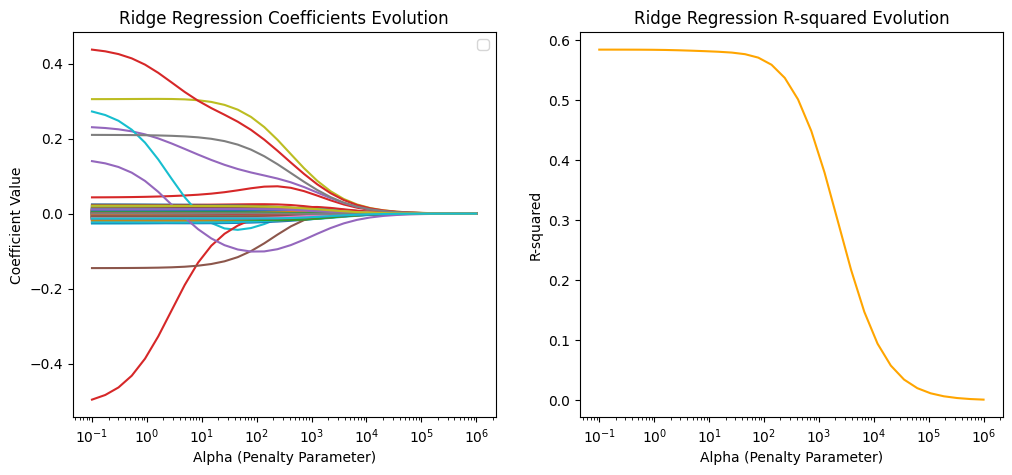

In [46]:
alpha_values = np.logspace(-1, 6, 30) # 30 values between 10^(-1) and 10^6

plot_coefficients_and_r2('ridge', X_train, Y_train, alpha_values)

**Question 5** : Lasso

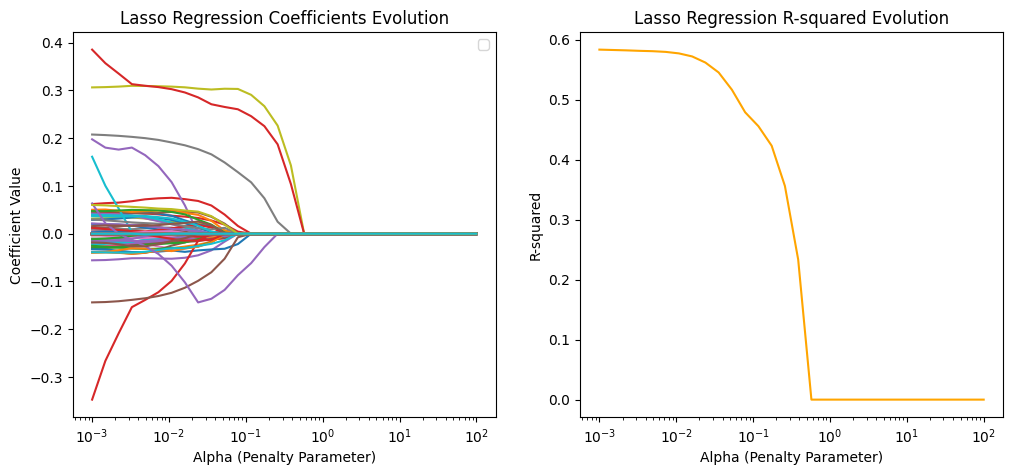

In [47]:
alpha_values = np.logspace(-3, 2, 30) # 30 values between 10^(-3) and 10^2
# Lasso Regression
plot_coefficients_and_r2('lasso', X_train, Y_train, alpha_values)


**Question 6** : Elastic net

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.402e-01, tolerance: 3.300e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e-02, tolerance: 3.300e-02
  model = cd_fast.enet_coordinate_descent(


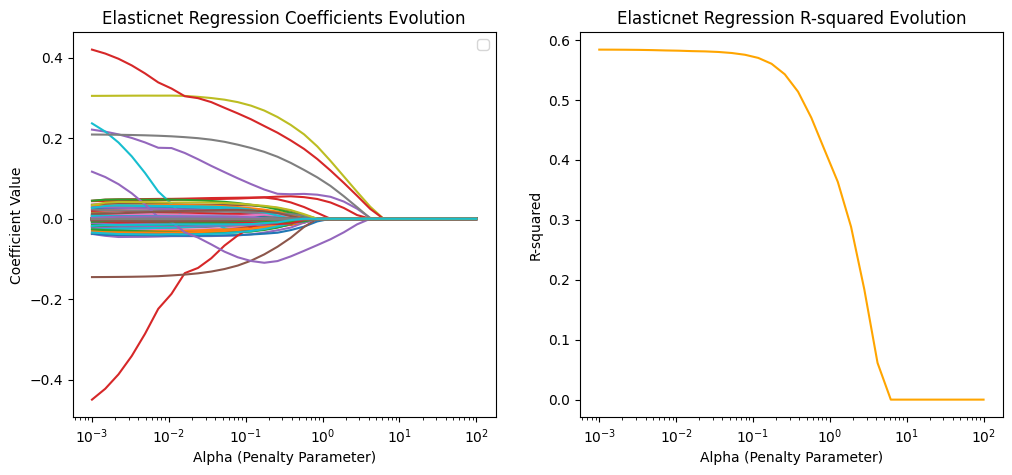

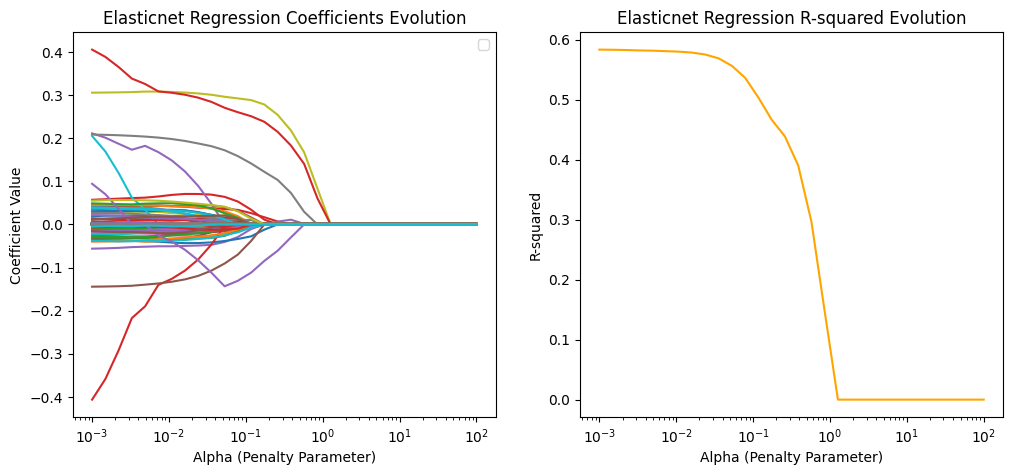

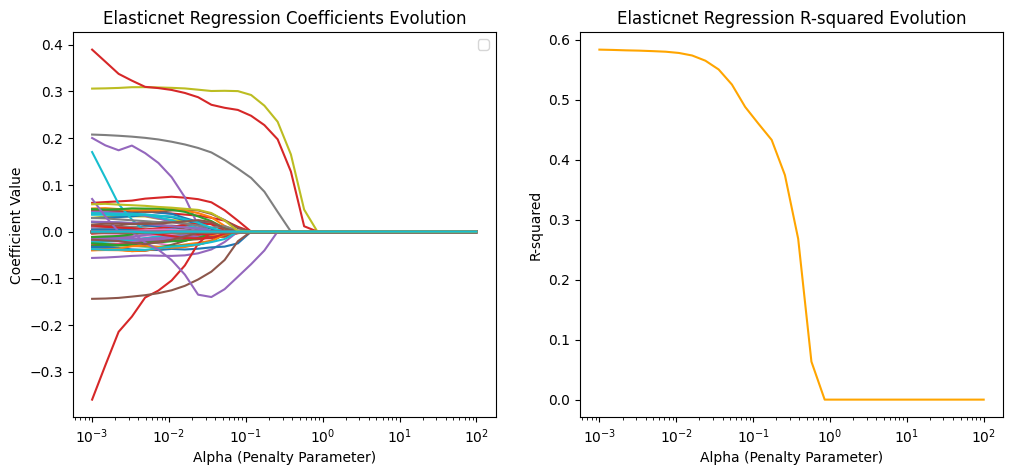

In [51]:
alpha_values = np.logspace(-3, 2, 30)  # 30 values between 10^(-3) and 10^2

#l1_ratio =   # L1 ratio for Elastic Net, 0.5 means equal L1 and L2 regularization

l1_ratio_values = [0.1, 0.5, 0.9]  # Experiment with different values
for l1_ratio in l1_ratio_values:
    plot_coefficients_and_r2('elasticnet', X_train, Y_train, alpha_values, l1_ratio)

**Question 7  : PCR**

**7.a**

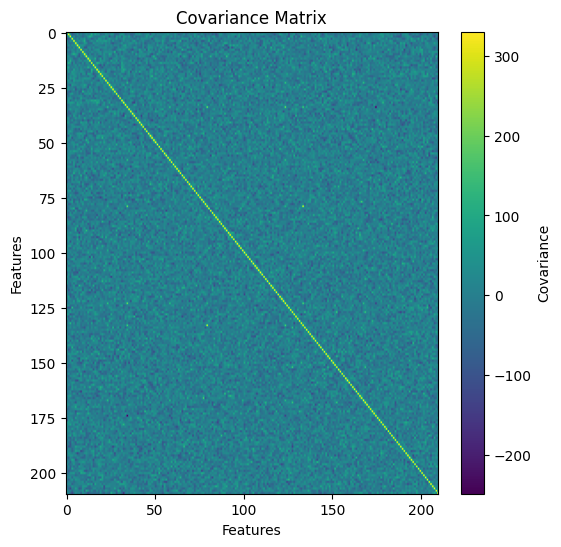

In [53]:
plt.figure(figsize=(6, 6))
plt.imshow(X_train.T @ X_train, cmap='viridis', aspect='auto')
plt.title('Covariance Matrix')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**7.b**

In [59]:
def PCA(M):
  U, s, V = np.linalg.svd(X, full_matrices=False)

  return  M @ U

plt.figure(figsize=(6, 6))
plt.imshow(PCA(X_train).T @ PCA(X_train), cmap='viridis', aspect='auto')
plt.title('Covariance Matrix')
plt.colorbar(label='Covariance')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 210)

<Figure size 600x600 with 0 Axes>

210